<div style="text-align: center;">
   <font size="5"> 2023年度　数式処理演習　pair試験問題 </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2023/11/30実施 </font>
</div>

- file: ~/symbolic_math/23_pair_ans.ipynb
- make problem: pick_works_from_ans 23_pair_ans.ipynb -1 '' '4, 11'

以下の問題を python で解き，LUNA へ提出せよ．LUNA へは ipynb と pdf 形式の２種類を提出すること．


# 問 1 微積分

## 1(a) データ点のプロット(15 点)

以下の3点のデータ点をxy平面上にプロットせよ．
```
import numpy as np
xdata = np.array( [1,2,3])
ydata = np.array([0,5,15])
```


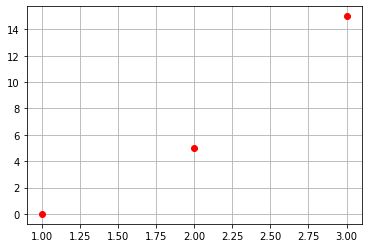

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xdata = np.array([1,2,3])
ydata = np.array([0,5,15])
plt.plot(xdata,ydata, 'o', color='r')

plt.grid()
plt.show()

## 1(b) 関数の微分(15 点)
上記のデータ点に対して，一次関数
$$
F(x) = a0 + a1*x
$$
でのフィッティングを考える．

データと関数との誤差の2乗で得られたsum関数のa0, a1に対する最安定(最小値)点を求めよ．
微分して連立方程式で解けばもとまります．

また，得られた関数と1(a)のデータ点を同時にプロットせよ．
うまくいけば，次のplotのようになります．

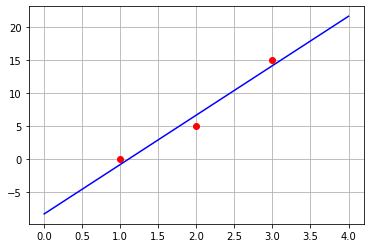

In [2]:
import numpy as np
xdata = np.array( [1,2,3])
ydata = np.array([0,5,15])

from sympy import *
a0, a1, x,y = symbols('a0, a1, x, y')

def func(x):
    return a0+a1*x

sum = 0
for i in range(0,3):
  sum += (ydata[i]-func(xdata[i]))**2

expand(sum)


3*a0**2 + 12*a0*a1 - 40*a0 + 14*a1**2 - 110*a1 + 250

In [3]:
sol1=solve((diff(sum, a0),expand(diff(sum, a1))),(a0,a1))
sol1

{a0: -25/3, a1: 15/2}

In [4]:
print(sol1[a0])
print( (a0+a1*x).subs(sol1))

-25/3
15*x/2 - 25/3


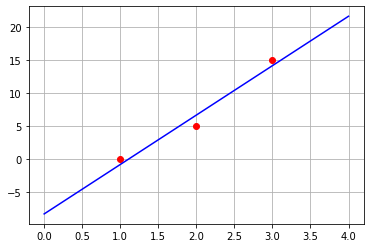

In [5]:
def f1(x):
    return sol1[a0]+sol1[a1]*x

xdata = np.array([1,2,3])
ydata = np.array([0,5,15])

plt.plot(xdata,ydata, 'o', color='r')
x_point=np.linspace(0,4,20)
plt.plot(x_point, f1(x_point),color='b')

plt.grid()
plt.show()


# 問 2 線形代数

## 2(a) ノルム(15 点)

次のデータ

```
edata = [0.1, -0.2, 0.4]

```
の平均と，　ユークリッドノルム 
$$
||x|| = \sqrt{x_1^2+x_2^2+\cdots + x_n^2}
$$　をベクトルの内積を使って求めよ．

平均は，  $n$をベクトルのサイズとしたとき，全ての要素を$1/n$で満たす(full)ベクトルとの内積で，
ユークリッドノルムはそのベクトル自身との内積の平方根で求められる．

In [6]:
import numpy as np

xdata = np.array([0.1, -0.2, 0.4])
nn = xdata.size
avdata = np.full(nn, 1.0/nn)
print(avdata)

print("average: ", avdata.transpose().dot(xdata))
print("Euclid norm:", sqrt(xdata.transpose().dot(xdata)))

[0.33333333 0.33333333 0.33333333]
average:  0.1
Euclid norm: 0.458257569495584


## 2(b) ヴァンデルモンド行列(15 点)

ヴァンデルモンド(Vandermonde)行列　$V$　を

$$
V = \begin{bmatrix}
1 & x_0 & x_0^2\\
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2\\
\end{bmatrix}
$$
として，
$$
V \begin{bmatrix}
a_0\\
a_1\\
a_2\\
\end{bmatrix}
=\begin{bmatrix}
y_0\\
y_1\\
y_2\\
\end{bmatrix}
$$
の逆行列から, 2次のフィッティング関数
$$
f(x)　= a_0 + a_1 x+a_2x^2
$$
を求めよ．

$x, y$データは
``` python
xdata = np.array([1,2,3])
ydata = np.array([0,5,15])
```
を使え．

ただし，以下に添付したBingの解答例(2023/11/28)は，題意から正解ではありません．

In [7]:
# Bingの解答例(2023/11/28)
import numpy as np

# データを定義します
xdata = np.array([1,2,3])
ydata = np.array([0,5,15])

# ヴァンデルモンド行列を生成します
V = np.vander(xdata, N=3)

# 逆行列を計算し、フィッティングパラメータを求めます
a = np.linalg.solve(V, ydata)

print("a0:", a[0])
print("a1:", a[1])
print("a2:", a[2])


a0: 2.499999999999999
a1: -2.499999999999998
a2: -1.3322676295501882e-15


In [8]:
# 正解は以下の通りです．Vandermonde行列の定義はちょっと曖昧なので注意してね．
# plotするとすぐにわかるんで，癖にしてください
import numpy as np

# データを定義します
xdata = np.array([1,2,3])
ydata = np.array([0,5,15])

V = np.full((3,3),0.0)
for i in range(0,3):
    for j in range(0,3):
        V[i,j]=xdata[i]**j

np.linalg.inv(V).dot(ydata)


array([ 0. , -2.5,  2.5])

# 問 3 センター試験原題(20 点)

(2021 大学入試センター試験　数学 II・B/本試験 第 2 問)

$a$ を実数とし，
$f(x)=(x-a)(x-2)$とおく．
また，
$F(x)= \int_0^x f(t)dt$とする．

(1) $a=1$のとき，　$F(x)$は
$x = \fbox{ ア }$で極小になる．

(2) $a = \fbox{ イ }$のとき，$F(x)$はつねに増加する．
また，$F(0) = \fbox{ ウ }$であるから，
$a = \fbox{ イ }$のとき，$F(2)$ の値は$\fbox{ エ }$である．

$\fbox{ エ }$の解答群:[0，　 正，　負]

(3) $a > \fbox{ イ }$とする．

$b$を実数とし，$G(x)= \int_b^x f(t)dt$とおく．

関数$y=G(x)$のグラフは，
$y=F(x)$のグラフを
$\fbox{ オ }$方向に
$\fbox{ カ }$だけ並行移動したものと一致する．
また，$G(x)$は$x = \fbox{ キ }$で極大になり，
$x = \fbox{ ク }$で極小になる．

$G(b) = \fbox{ ケ }$であるから，
$b = \fbox{ キ }$のとき，
曲線$y=G(x)$と
$x$軸との共有点の個数は$\fbox{ コ }$個である．

$\fbox{ オ }$の解答群:[$x$軸，　$y$軸]

$\fbox{ カ }$の解答群:[$b$, $-b$, $F(b)$, $-F(b)$, $F(-b)$, $-F(-b)$]

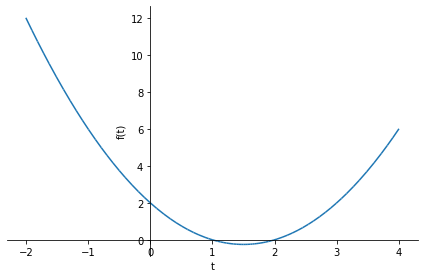

x**3/3 - 3*x**2/2 + 2*x


In [9]:
from sympy import *

a,b,x,t = symbols('a b x t')
f=(t-a)*(t-2)
plot(f.subs({a:1}),(t,-2, 4))
F=integrate(f.subs(a,1),(t,0,x))
print(F)

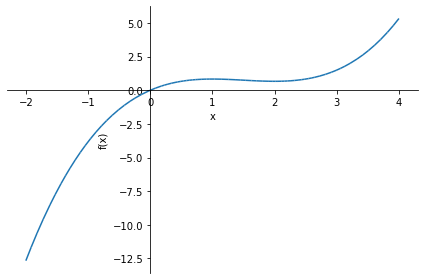

In [10]:
plot(F,(x,-2, 4))

In [11]:
print(diff(F,x))
x_min = solve(diff(F,x),x)[1]
x_min

x**2 - 3*x + 2


2

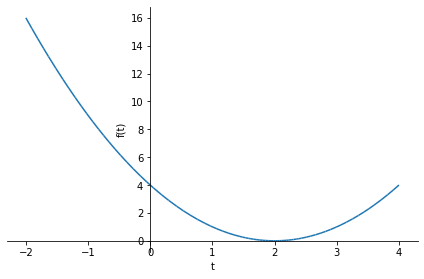

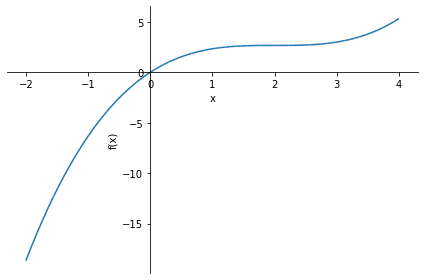

In [12]:
plot(f.subs({a:2}),(t,-2, 4))
F=integrate(f.subs(a,2),(t,0,x))
plot(F,(x,-2, 4))

In [13]:
F.subs(x, 0)

0

In [14]:
F.subs(x, 2)

8/3

In [15]:
G=integrate(f,(t,b,x))
G

-2*a*b + 2*a*x - b**3/3 - b**2*(-a/2 - 1) + x**3/3 + x**2*(-a/2 - 1)

In [16]:
s2=solve(diff(G,x),x)
s2

[2, a]

In [17]:
F.subs(x,b)-F.subs(x,b)

0

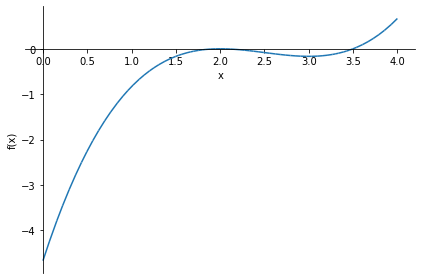

In [18]:
plot(G.subs(b,2).subs(a,3),(x,0,4))

# 問 4 センター試験改変(20 点)

問３で$f(x)=(x-a)(x-\sqrt{5})$として同様に求めよ．
さらに， 得られたG(x)関数をsubs({a: 3}), (x,2,3.5)でプロットせよ．

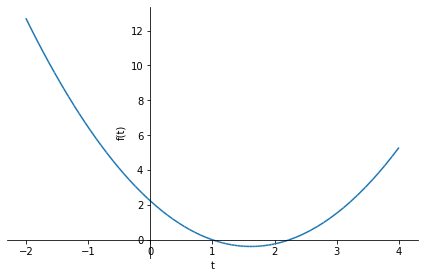

x**3/3 + x**2*(-sqrt(5)/2 - 1/2) + sqrt(5)*x


In [19]:
from sympy import *

a,b,x,t = symbols('a b x t')
f=(t-a)*(t-sqrt(5))
plot(f.subs({a:1}),(t,-2, 4))
F=integrate(f.subs(a,1),(t,0,x))
print(F)

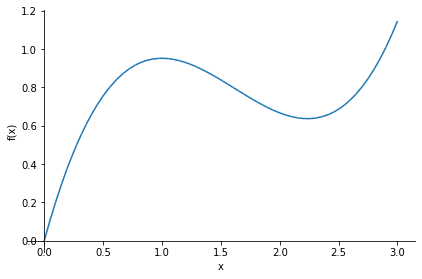

In [20]:
plot(F,(x,0, 3))

In [21]:
print(diff(F,x))
x_min = solve(diff(F,x),x)[1]

x_min

x**2 + 2*x*(-sqrt(5)/2 - 1/2) + sqrt(5)


sqrt(5)

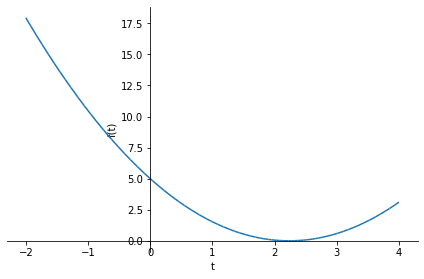

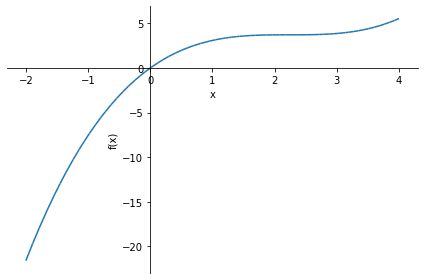

In [22]:
plot(f.subs({a:x_min}),(t,-2, 4))
F=integrate(f.subs(a,x_min),(t,0,x))
plot(F,(x,-2, 4))


In [23]:
F.subs(x, 0)

0

In [24]:
F.subs(x, 2)

38/3 - 4*sqrt(5)

In [25]:
G=integrate(f,(t,b,x))
G

-sqrt(5)*a*b + sqrt(5)*a*x - b**3/3 - b**2*(-a/2 - sqrt(5)/2) + x**3/3 + x**2*(-a/2 - sqrt(5)/2)

In [26]:
solve(diff(G,x),x)

[sqrt(5), a]

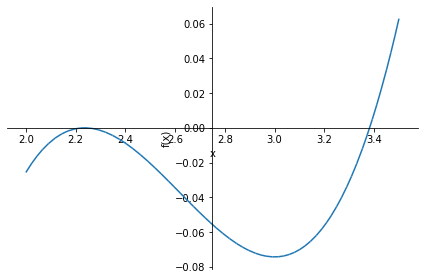

In [27]:
plot(G.subs(b,x_min).subs(a,3),(x,2,3.5))